# Project Analysis



In [1]:
## headers
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import date

from matplotlib import pyplot as plt

In [2]:
##testing add

## Ryan adding to branch ryan

Superstore = pd.read_csv("Superstore.csv")
ss = Superstore

# Data Preparation

In [3]:
ss.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:


ss["Pcnt Profit"] = 100*ss["Profit"].divide(ss["Sales"]-ss["Profit"])
ss.loc[ss["Profit"]>0,"Pcnt Profit"] = 100*ss["Profit"].divide(ss["Sales"])

## to eplain this first, getting indexes of each slash then uging that to slice
ss['Opos1'] = ss.apply(lambda x: x["Order Date"].find('/', 0), axis=1)
ss['Opos2'] = ss.apply(lambda x: x["Order Date"].find('/', x["Opos1"]+1), axis=1)

ss["OrderMonth"] = ss.apply(lambda x: int(x["Order Date"][0:x["Opos1"]]), axis=1)
ss["OrderDay"] = ss.apply(lambda x: int(x["Order Date"][x["Opos1"]+1:x["Opos2"]]), axis=1)
ss["OrderYear"] = ss.apply(lambda x: int(x["Order Date"][x["Opos2"]+1:]), axis=1)
ss["OrderDateObj"] = ss.apply(lambda x: date(x["OrderYear"], x["OrderMonth"], x["OrderDay"]), axis=1)

ss['Spos1'] = ss.apply(lambda x: x["Ship Date"].find('/', 0), axis=1)
ss['Spos2'] = ss.apply(lambda x: x["Ship Date"].find('/', x["Spos1"]+1), axis=1)

ss["ShipMonth"] = ss.apply(lambda x: int(x["Ship Date"][0:x["Spos1"]]), axis=1)
ss["ShipDay"] = ss.apply(lambda x: int(x["Ship Date"][x["Spos1"]+1:x["Spos2"]]), axis=1)
ss["ShipYear"] = ss.apply(lambda x: int(x["Ship Date"][x["Spos2"]+1:]), axis=1)
ss["ShipDateObj"] = ss.apply(lambda x: date(x["ShipYear"], x["ShipMonth"], x["ShipDay"]), axis=1)



ss["DaysToShip"] = ss.apply(lambda x: (x["ShipDateObj"] - x["OrderDateObj"]).days, axis=1)
#ok, so by using a time and date library i dont have to worry about leap days or any of that 
ss

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,OrderDay,OrderYear,OrderDateObj,Spos1,Spos2,ShipMonth,ShipDay,ShipYear,ShipDateObj,DaysToShip
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,8,2016,2016-11-08,2,5,11,11,2016,2016-11-11,3
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,8,2016,2016-11-08,2,5,11,11,2016,2016-11-11,3
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,12,2016,2016-06-12,1,4,6,16,2016,2016-06-16,4
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,11,2015,2015-10-11,2,5,10,18,2015,2015-10-18,7
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,11,2015,2015-10-11,2,5,10,18,2015,2015-10-18,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,21,2014,2014-01-21,1,4,1,23,2014,2014-01-23,2
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,26,2017,2017-02-26,1,3,3,3,2017,2017-03-03,5
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,26,2017,2017-02-26,1,3,3,3,2017,2017-03-03,5
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,26,2017,2017-02-26,1,3,3,3,2017,2017-03-03,5


In [5]:
ss = Superstore
wh = pd.DataFrame()
ss_grouped = ss.groupby(["OrderYear","OrderMonth","Region","State","Ship Mode","Segment","Category","Sub-Category"])
wh["total_sales"] = ss_grouped["Row ID"].count()
wh["sold_items"] = ss_grouped["Quantity"].sum()
wh["total_revenue"] = ss_grouped["Sales"].sum()
wh["total_profit"] = ss_grouped["Profit"].sum()
wh

total_sales  \
OrderYear OrderMonth Region  State      Ship Mode      Segment     Category        Sub-Category                
2014      1          Central Illinois   Standard Class Home Office Office Supplies Binders                 1   
                                                                                   Labels                  1   
                                                                                   Storage                 1   
                             Indiana    Standard Class Consumer    Office Supplies Fasteners               1   
                             Michigan   Standard Class Consumer    Furniture       Furnishings             2   
...                                                                                                      ...   
2017      12         West    Washington Standard Class Consumer    Office Supplies Storage                 1   
                                                       Corporate   Furniture       Furnishings             2   
                                                                   Office Supplies Binders                 2   
                                                                                   Storage                 1   
                                                       Home Office Furniture       Furnishings             1   

                                                                                                 sold_items  \
OrderYear OrderMonth Region  State      Ship Mode      Segment     Category        Sub-Category               
2014      1          Central Illinois   Standard Class Home Office Office Supplies Binders                2   
                                                                                   Labels                 3   
                                                                                   Storage                3   
                             Indiana    Standard Class Consumer    Office Supplies Fasteners              3   
                             Michigan   Standard Class Consumer    Furniture       Furnishings            6   
...                                                                                                     ...   
2017      12         West    Washington Standard Class Consumer    Office Supplies Storage                6   
                                                       Corporate   Furniture       Furnishings           14   
                                                                   Office Supplies Binders                6   
                                                                                   Storage                4   
                                                       Home Office Furniture       Furnishings            3   

                                                                                                 total_revenue  \
OrderYear OrderMonth Region  State      Ship Mode      Segment     Category        Sub-Category                  
2014      1          Central Illinois   Standard Class Home Office Office Supplies Binders               3.540   
                                                                                   Labels               11.784   
                                                                                   Storage             272.736   
                             Indiana    Standard Class Consumer    Office Supplies Fasteners             5.940   
                             Michigan   Standard Class Consumer    Furniture       Furnishings         287.670   
...                                                                                                        ...   
2017      12         West    Washington Standard Class Consumer    Office Supplies Storage            1003.620   
                                                       Corporate   Furniture       Furnishings          78.080   
                                                        

**Question 1.** Analyze the sales by category by year. Are the sales in each
category improving year-after-year? What are the categories of products
with the best improvement in sales? What are the categories of products
that lagged?

In [6]:
q1 = wh.groupby(["Category","OrderYear"]).sum().reset_index()
q1

,Category,OrderYear,total_sales,sold_items,total_revenue,total_profit
0,Furniture,2014,421,1623,157192.8531,5457.7255
1,Furniture,2015,452,1775,170518.2370,3015.2029
2,Furniture,2016,562,2193,198901.4360,6959.9531
3,Furniture,2017,686,2437,215387.2692,3018.3913
4,Office Supplies,2014,1217,4569,151776.4120,22593.4161
5,Office Supplies,2015,1241,4715,137233.4630,25099.5338
6,Office Supplies,2016,1566,5946,183939.9820,35061.2292
7,Office Supplies,2017,2002,7676,246097.1750,39736.6217
8,Technology,2014,355,1389,175278.2330,21492.8325
9,Technology,2015,409,1489,162780.8090,33503.8670


Text(0.5, 1.0, 'Totals Sales Over Time by Category')

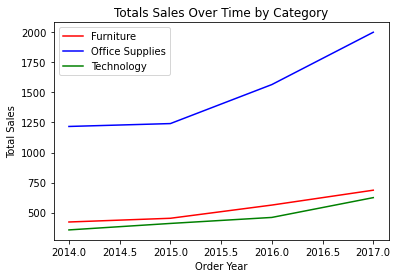

In [7]:
plt.figure()
plt.title
plt.plot(q1[q1.Category=="Furniture"].OrderYear, q1[q1.Category=="Furniture"].total_sales, color="red",label="Furniture")
plt.plot(q1[q1.Category=="Office Supplies"].OrderYear, q1[q1.Category=="Office Supplies"].total_sales,color="blue",label="Office Supplies")
plt.plot(q1[q1.Category=="Technology"].OrderYear, q1[q1.Category=="Technology"].total_sales, color="green",label="Technology")
plt.legend()
plt.xlabel("Order Year")
plt.ylabel("Total Sales")
plt.title("Totals Sales Over Time by Category")

Each sales category is indeed increasing in sales over each year. Office supplies appear to have the steepest increase in sales over time, while Furniture and Technology seem to equally increase a little bit over the years.

**Question 2.** Do the same analysis for subcategories, concentrating specifically on the subcategories of the categories that perform the best/the worst.

In [8]:
q2 = wh.groupby(["Category","Sub-Category","OrderYear"]).sum().reset_index()
q2[q2["Category"]!="Furniture"].head() # middle of the two categories excluded

,Category,Sub-Category,OrderYear,total_sales,sold_items,total_revenue,total_profit
16,Office Supplies,Appliances,2014,93,314,15313.625,2459.4999
17,Office Supplies,Appliances,2015,94,365,23241.289,2511.8957
18,Office Supplies,Appliances,2016,114,396,26050.315,5301.3415
19,Office Supplies,Appliances,2017,165,654,42926.932,7865.2683
20,Office Supplies,Art,2014,164,613,6057.982,1406.8031


Text(0.5, 1.0, 'Total Sales Over Time by Sub-Category')

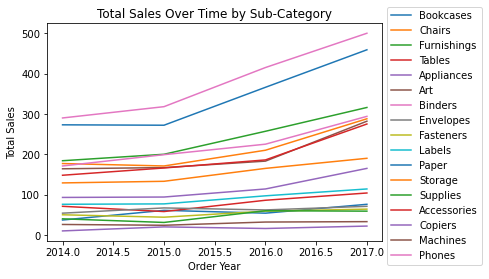

In [9]:
plt.figure()
for sc in q2["Sub-Category"].unique():
    plt.plot(q2[q2["Sub-Category"]==sc].OrderYear, q2[q2["Sub-Category"]==sc].total_sales,label=sc)
plt.legend(bbox_to_anchor=(1,1.1))
plt.xlabel("Order Year")
plt.ylabel("Total Sales")
plt.title("Total Sales Over Time by Sub-Category")

The Sub-Categories that were already higher in sales around 2014 tended to be the ones to increase the most in sales. Sub-Categories like Bookcases and Binders started the highest and went up the most, while Sub-Categories like Copiers and Machines started low and hardly changed at all up to 2017.

**Question 3.** Analyze the categories of the products for profitability by
year. Compare sales numbers and revenue to profit for each category/year.
Are there categories with large revenue and lower than expected profit? How
about the other way around: are there cateogories that generate excellent
profits despite smaller sales/revenue.

Text(0.5, 1.0, 'Total Profit Over Time by Category')

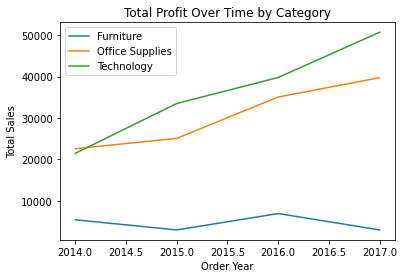

In [10]:
plt.figure()
q3 = q1
for c in q2["Category"].unique():
    plt.plot(q3[q3["Category"]==c].OrderYear, q3[q3["Category"]==c].total_profit,label=c)
plt.legend()
plt.xlabel("Order Year")
plt.ylabel("Total Sales")
plt.title("Total Profit Over Time by Category")

Text(0.5, 1.0, 'Total Revenue Over Time by Category')

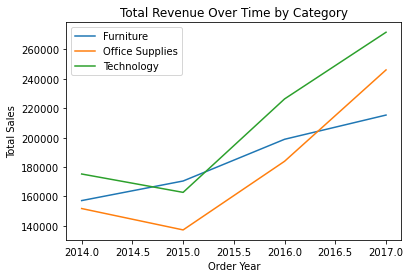

In [11]:
plt.figure()
for c in q2["Category"].unique():
    plt.plot(q3[q3["Category"]==c].OrderYear, q3[q3["Category"]==c].total_revenue,label=c)
plt.legend()
plt.xlabel("Order Year")
plt.ylabel("Total Sales")
plt.title("Total Revenue Over Time by Category")

Text(0.5, 1.0, 'Profitability (Profit/Sale) Over Time by Category')

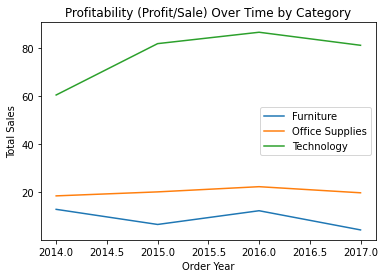

In [12]:
plt.figure()
for c in q2["Category"].unique():
    plt.plot(q3[q3["Category"]==c].OrderYear, q3[q3["Category"]==c].total_profit / q3[q3["Category"]==c].total_sales,label=c)
plt.legend()
plt.xlabel("Order Year")
plt.ylabel("Total Sales")
plt.title("Profitability (Profit/Sale) Over Time by Category")

Furniture is one category that exprerienced somewhat conflicting profit and revenue behavior. While its revenue steadily increased over time, its profits ended up trending downward.

Technology is another interesting category. It has the lowest amount of sales every year, but most of the time it experiences higher revenue and higher profits than the other two categories. This can likely be explained by the higher price of technology items, visualized in the Profitability graph, where technology is shown to make the most profit per sale consistantly.

**Question 4** Analyze sales vs profit by year and month. Are there specific
months in each year where sales spike and/or profits increase? What are
overall trends?

In [13]:
q4 = wh.groupby(["OrderYear","OrderMonth"]).sum().reset_index()
q4

,OrderYear,OrderMonth,total_sales,sold_items,total_revenue,total_profit
0,2014,1,79,284,14236.8950,2450.1907
1,2014,2,46,159,4519.8920,862.3084
2,2014,3,157,585,55691.0090,498.7299
3,2014,4,135,536,28295.3450,3488.8352
4,2014,5,122,466,23648.2870,2738.7096
5,2014,6,135,521,34595.1276,4976.5244
6,2014,7,143,550,33946.3930,-841.4826
7,2014,8,153,609,27909.4685,5318.1050
8,2014,9,268,1000,81777.3508,8328.0994
9,2014,10,159,573,31453.3930,3448.2573


Text(0.5, 1.0, 'Sales By month and year')

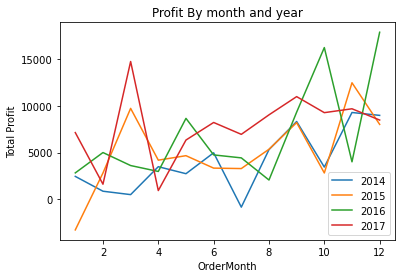

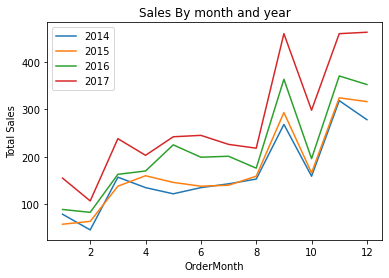

In [14]:
plt.figure()
for c in q4["OrderYear"].unique():
    plt.plot(q4[q4["OrderYear"]==c].OrderMonth, q4[q4["OrderYear"]==c].total_profit, label=c)
plt.legend()
plt.xlabel("OrderMonth")
plt.ylabel("Total Profit")
plt.title("Profit By month and year")

plt.figure()
for c in q4["OrderYear"].unique():
    plt.plot(q4[q4["OrderYear"]==c].OrderMonth, q4[q4["OrderYear"]==c].total_sales,label=c)
plt.legend()
plt.xlabel("OrderMonth")
plt.ylabel("Total Sales")
plt.title("Sales By month and year")

**Description** The overall trend is that Sales are incredibly higher in the late months of the year, especially Septemeber and November/December. While sales Have a clear increase in the holiday months, profits are more Varied, with ups and downs all over, but more often higher profits in the holiday months.

**Question 5** What product categories are most popular in different regions? Are they the same or different? Is this popularity stable over time,
or does it change?

In [15]:
q51 = wh.groupby(["Region", "Category"]).total_sales.count()
q52 = wh.groupby(["OrderYear", "Region", "Category"]).total_sales.count()
print(q51)
print(q52)

Region   Category       
Central  Furniture           428
         Office Supplies    1200
         Technology          364
East     Furniture           508
         Office Supplies    1390
         Technology          453
South    Furniture           299
         Office Supplies     855
         Technology          263
West     Furniture           567
         Office Supplies    1418
         Technology          489
Name: total_sales, dtype: int64
OrderYear  Region   Category       
2014       Central  Furniture           81
                    Office Supplies    249
                    Technology          63
           East     Furniture           99
                    Office Supplies    264
                    Technology          76
           South    Furniture           60
                    Office Supplies    194
                    Technology          58
           West     Furniture          117
                    Office Supplies    299
                    Technology        

**Explanation** Office supplies are always the most popular, in every location, and every year. The popularity is stable, but there is small variation in the yearly sales counts.

**Question 6** How are purchases different across different segments of customers? What categories and subcategories of products are most popular
with each segment? What categories or subcategories generate most (least)
profit for each segment.


In [16]:
q61 = wh.groupby(["Segment", "Category"]).sold_items.count()
q611 = wh.groupby(["Segment", "Sub-Category"]).sold_items.count()
q621 = wh.groupby(["Segment", "Category"]).total_profit.sum()
q622 = wh.groupby(["Segment", "Sub-Category"]).total_profit.sum()
print("Popularity categories\n", q61)
print("popular sub-categories\n", q611)
print("Profit\n",q621)
print("Subcategory Profit\n",q622)

Popularity categories
 Segment      Category       
Consumer     Furniture           913
             Office Supplies    2423
             Technology          786
Corporate    Furniture           555
             Office Supplies    1516
             Technology          468
Home Office  Furniture           334
             Office Supplies     924
             Technology          315
Name: sold_items, dtype: int64
popular sub-categories
 Segment      Sub-Category
Consumer     Accessories     336
             Appliances      213
             Art             339
             Binders         548
             Bookcases       124
             Chairs          273
             Copiers          34
             Envelopes       123
             Fasteners       108
             Furnishings     371
             Labels          164
             Machines         52
             Paper           491
             Phones          364
             Storage         345
             Supplies         92
      

**Explanation** The most popular category with Consumers is Office supplies, with Corporate is is also office supplies, likewise iwth home office.

The most popular subcategories are Binders for Consumers, Coprorate, and Home office.

The most Profitable Categories Is technology, for all 3 types of Purchasers.

the most profitable sub-categories is Copiers for all three types of purchasers.

**Queestion 7** Analyze relationship between the time between order and
shipment by shipping mode. Is this time the same or different for different
shipping modes? Is the time between order and shipment remaining stable
for each shipment mode over time (year-by-year), or is it changing? If it is
changing - in what direction?

<AxesSubplot:title={'center':'DaysToShip'}, xlabel='Ship Mode'>

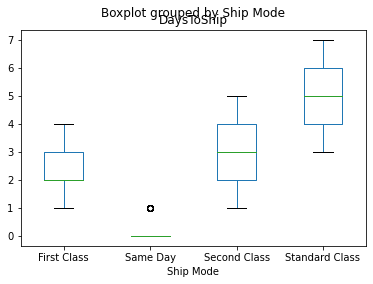

In [17]:
ss.boxplot(by="Ship Mode",column=["DaysToShip"],grid=False)


Text(0.5, 1.0, 'Average Time Between Order and Shipment by Year and Category')

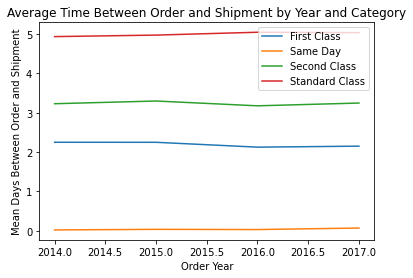

In [18]:
q7 = ss.groupby(["Ship Mode","OrderYear"])["DaysToShip"].mean().reset_index()
for sm in q7["Ship Mode"].unique():
    plt.plot(q7[q7["Ship Mode"]==sm]["OrderYear"],q7[q7["Ship Mode"]==sm]["DaysToShip"],label=sm)
plt.legend()
plt.xlabel("Order Year")
plt.ylabel("Mean Days Between Order and Shipment")
plt.title("Average Time Between Order and Shipment by Year and Category")

**Explanation** While this time does differ between shipping modes, it does not seem to vary very noticably over time, as shown in this graph of the mean days to ship for each category over time.


**Question 8** 

In [19]:
q8 = wh.groupby(["Ship Mode", "Segment"]).total_sales.count()
q8unstack = q8.unstack()
(q8.div(q8unstack.sum(axis=1),axis = 0))*100#percentage so mult by 100

Ship Mode       Segment    
First Class     Consumer       49.481481
                Corporate      31.925926
                Home Office    18.592593
Same Day        Consumer       59.128631
                Corporate      20.954357
                Home Office    19.917012
Second Class    Consumer       51.032448
                Corporate      31.976401
                Home Office    16.991150
Standard Class  Consumer       48.948375
                Corporate      31.123858
                Home Office    19.927767
dtype: float64

In [20]:
q82 = wh.groupby([ "Segment", "Ship Mode"]).total_sales.count()
q82unstack = q82.unstack()
(q82.div(q82unstack.sum(axis=1),axis = 0))*100#percentage so mult by 100

Segment      Ship Mode     
Consumer     First Class       16.205725
             Same Day           6.914119
             Second Class      20.984959
             Standard Class    55.895197
Corporate    First Class       16.975187
             Same Day           3.977944
             Second Class      21.346987
             Standard Class    57.699882
Home Office  First Class       15.956771
             Same Day           6.102988
             Second Class      18.308964
             Standard Class    59.631278
dtype: float64

**Explanation** Every segment prefers to use Standard Class Shipping, with home office and corporate having the higher preference towards the budget option
Most first class shipping is shipping to the Consumer Scene, , but not as big a differential of the same day shipping, which is 59% sent to Consumer segment. second and Standard class are also proportionally sent more towards the Consumer Segment

**Question 9** Visualize the relationships between the profit and the quantity of products sold in each category in each month. If using scatterplots,
use size of the dots and their color to incorporate information from other
variables available to you (number of orders, volume of sales, category of
the product, year, etc...). Explain what you see in your visualizations (note,
you can have multiple visualizations here - as many as makes sense for you
to create).

<AxesSubplot:title={'center':'Profit vs Sales by Year'}, xlabel='Profit', ylabel='Sales'>

<Figure size 432x288 with 0 Axes>

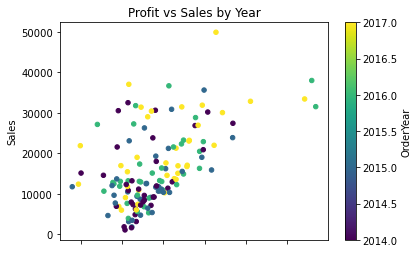

In [21]:
plt.figure()
q9 = ss.groupby(["Category","OrderMonth","OrderYear"]).sum().reset_index()
q9.plot.scatter(x="Profit",y="Sales",c="OrderYear",colormap='viridis',title=("Profit vs Sales by Year"))

<AxesSubplot:title={'center':'Profit vs Sales by Month'}, xlabel='Profit', ylabel='Sales'>

<Figure size 432x288 with 0 Axes>

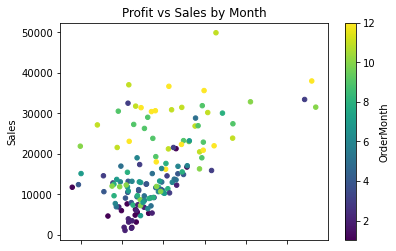

In [22]:
plt.figure()
q9.plot.scatter(x="Profit",y="Sales",c="OrderMonth",colormap='viridis',title=("Profit vs Sales by Month"))

<AxesSubplot:title={'center':'Profit vs Sales by Category'}, xlabel='Profit', ylabel='Sales'>

<Figure size 432x288 with 0 Axes>

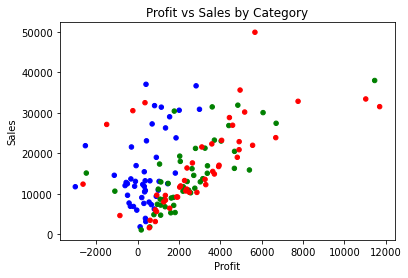

In [23]:
plt.figure()
q9c = {
    "Furniture": "blue",
    "Office Supplies": "green",
    "Technology": "red"
}
q9.plot.scatter(x="Profit",y="Sales",c=q9["Category"].map(q9c),title=("Profit vs Sales by Category"))

**Explanations** The 

**Question 10** Visualize the relationships between the revenue and the
profit for different categories/sub-categories of the products for different segments of the customers. If using scatterplots, use the size of the dots and
their color to incorporate other useful for analysis variables.



<AxesSubplot:title={'center':'Profit Versus Sales for categories, sized by years after 2014'}, xlabel='Profit', ylabel='Sales'>

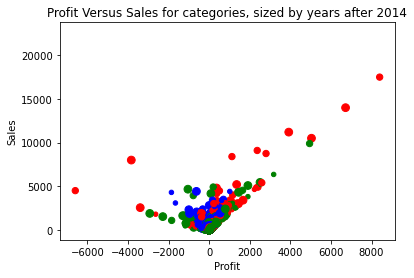

In [24]:
ss["q10c"] = ss["Category"].map({
    "Furniture": "blue",
    "Office Supplies": "green",
    "Technology": "red"
})
ss.plot.scatter(y= "Sales", x = "Profit", c = "q10c", s = (ss["OrderYear"] - 2014)*20, title="Profit Versus Sales for categories, sized by years after 2014")

<AxesSubplot:title={'center':'Profit Versus Sales for categories, sized by years after 2014'}, xlabel='Profit', ylabel='Sales'>

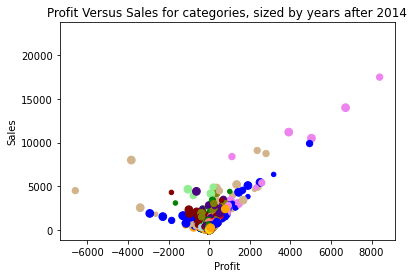

In [25]:
ss["q101c"] = ss["Sub-Category"].map({
    "Accessories":   "red",
     "Appliances":   "orange",
     "Art":  "Yellow",
     "Binders": "blue",
     "Bookcases":      "green",
     "Chairs":    "indigo",
     "Copiers":  "violet",
     "Envelopes":  "grey",
     "Fasteners"    :     "black",
     "Furnishings"   :   "Lightblue",
     "Labels"         :  "brown",
     "Machines"        :  "tan",
     "Paper"  :    "Gold",
     "Phones"  :    "Olive",
     "Storage"  :     "salmon",
     "Supplies"  :     "lightgreen",
     "Tables"     :  "maroon",
})
ss.plot.scatter(y= "Sales", x = "Profit", c ="q101c", s = (ss["OrderYear"] - 2014)*20, title="Profit Versus Sales for categories, sized by years after 2014")

**Question 11** Create heatmaps (if you have not done so to answer earlier
questions) showing the distributions of orders

• by customer segment and shipment type

• by customer segment and category of product

• by category of product and region

• by region and and month of sale for each year individually

In [26]:
import seaborn as sns
ss.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Pcnt Profit', 'Opos1', 'Opos2', 'OrderMonth', 'OrderDay', 'OrderYear',
       'OrderDateObj', 'Spos1', 'Spos2', 'ShipMonth', 'ShipDay', 'ShipYear',
       'ShipDateObj', 'DaysToShip', 'q10c', 'q101c'],
      dtype='object')

<AxesSubplot:xlabel='Ship Mode', ylabel='Segment'>

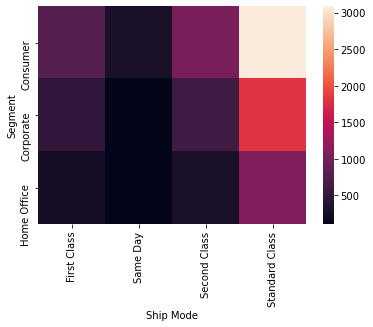

In [27]:
cs_st = ss.groupby(["Segment","Ship Mode"]).count()["Row ID"].unstack()
sns.heatmap(cs_st)

<AxesSubplot:xlabel='Category', ylabel='Segment'>

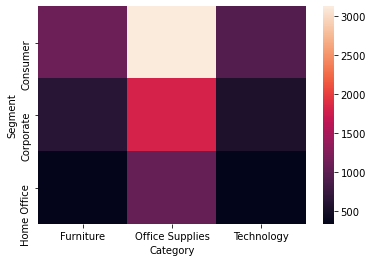

In [28]:
cs_cp = ss.groupby(["Segment","Category"]).count()["Row ID"].unstack()
sns.heatmap(cs_cp)

<AxesSubplot:xlabel='Region', ylabel='Category'>

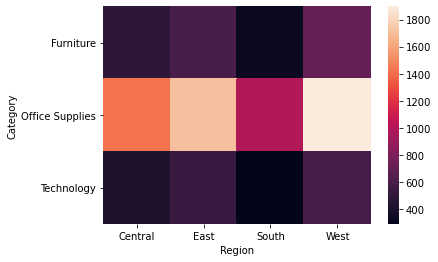

In [29]:
cp_re = ss.groupby(["Category","Region"]).count()["Row ID"].unstack()
sns.heatmap(cp_re)

<AxesSubplot:xlabel='Region', ylabel='OrderYear-OrderMonth'>

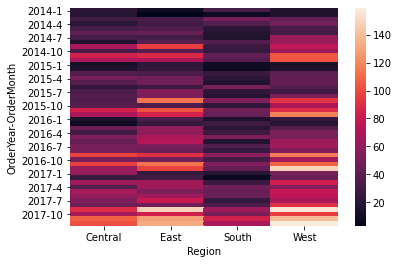

In [30]:
re_mo = ss.groupby(["OrderYear","OrderMonth","Region"]).count()["Row ID"].unstack()
sns.heatmap(re_mo)

**Question 12** Analyze the distribution of sales by region. Have sales to
specific regions changed significantly over time (year-to-year) as compared
to other regions? Are there any states that account for a larger than usual
number of sales/revenue/profit?


Text(0.5, 1.0, 'Profit By State and year')

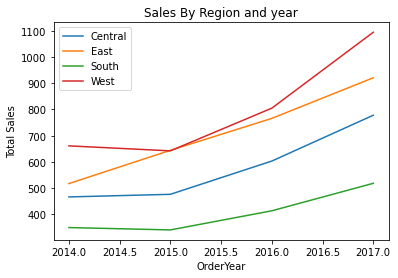

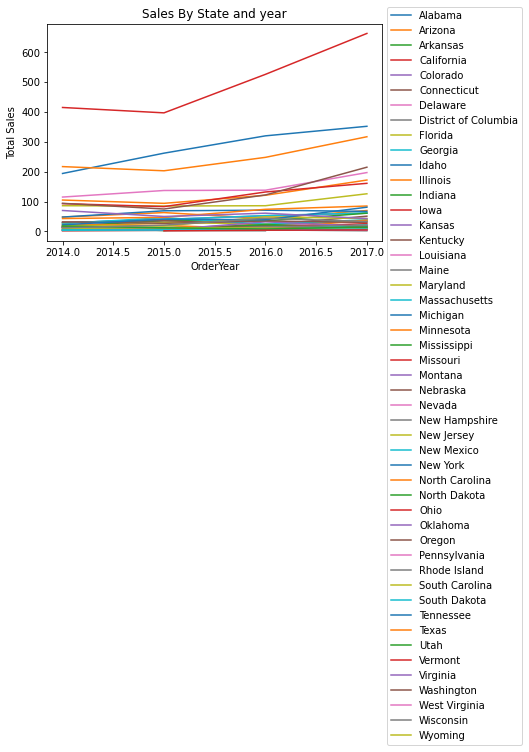

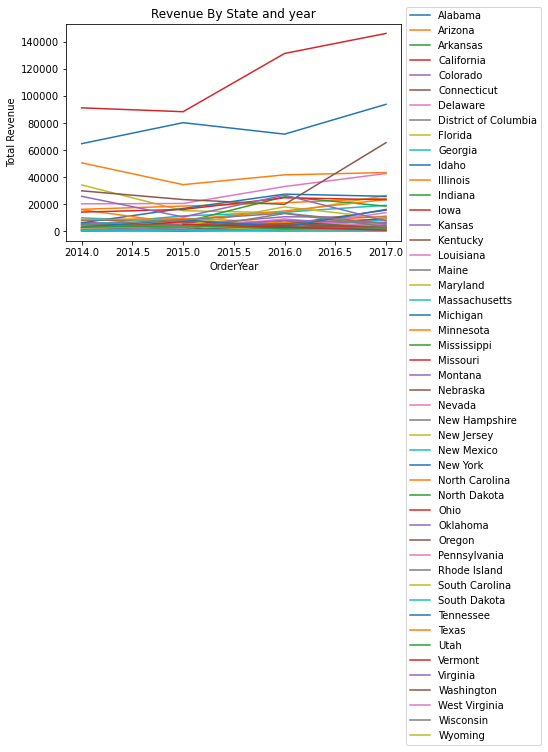

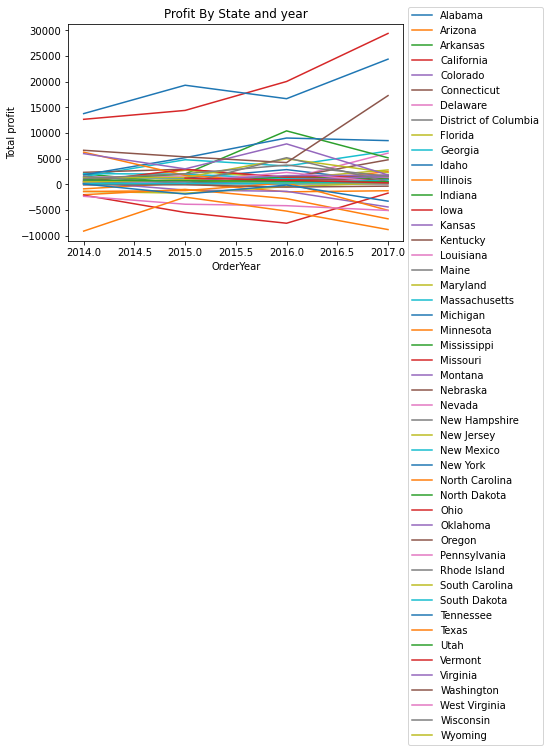

In [31]:
s12 = wh.groupby(["Region", "OrderYear"]).sum().reset_index()

plt.figure()
for c in s12["Region"].unique():
    plt.plot(s12[s12["Region"]==c].OrderYear, s12[s12["Region"]==c].total_sales,label=c)
plt.legend()
plt.xlabel("OrderYear")
plt.ylabel("Total Sales")
plt.title("Sales By Region and year")

s12 = wh.groupby(["State", "OrderYear"]).sum().reset_index()


plt.figure()
for c in s12["State"].unique():
    plt.plot(s12[s12["State"]==c].OrderYear, s12[s12["State"]==c].total_sales,label=c)
plt.legend(bbox_to_anchor=(1,1.1))
plt.xlabel("OrderYear")
plt.ylabel("Total Sales")
plt.title("Sales By State and year")

#revenue
plt.figure()
for c in s12["State"].unique():
    plt.plot(s12[s12["State"]==c].OrderYear, s12[s12["State"]==c].total_revenue,label=c)
plt.legend(bbox_to_anchor=(1,1.1))
plt.xlabel("OrderYear")
plt.ylabel("Total Revenue")
plt.title("Revenue By State and year")

#Profit
plt.figure()
for c in s12["State"].unique():
    plt.plot(s12[s12["State"]==c].OrderYear, s12[s12["State"]==c].total_profit,label=c)
plt.legend(bbox_to_anchor=(1,1.1))
plt.xlabel("OrderYear")
plt.ylabel("Total profit")
plt.title("Profit By State and year")



**Explanation** The west region had the biggest increase in Sales over the years. 

California is a large outlier in all , revenue, and sales, however, while still at the top, there is competition in Profit from new york

**Question 13** Analyze the distriution of sales by region/state and product
category and customer segment. Describe any interesting things you see.
For each question, apply appropriate slice-and-dice and rollup operations
to construct the data frame containing precisely the data you need to study
it. Conduct analysis via appropriate text-based, and graphics-based visualizations. Provide explanations for what you are doing, and the results you
are observing.


<AxesSubplot:xlabel='State'>

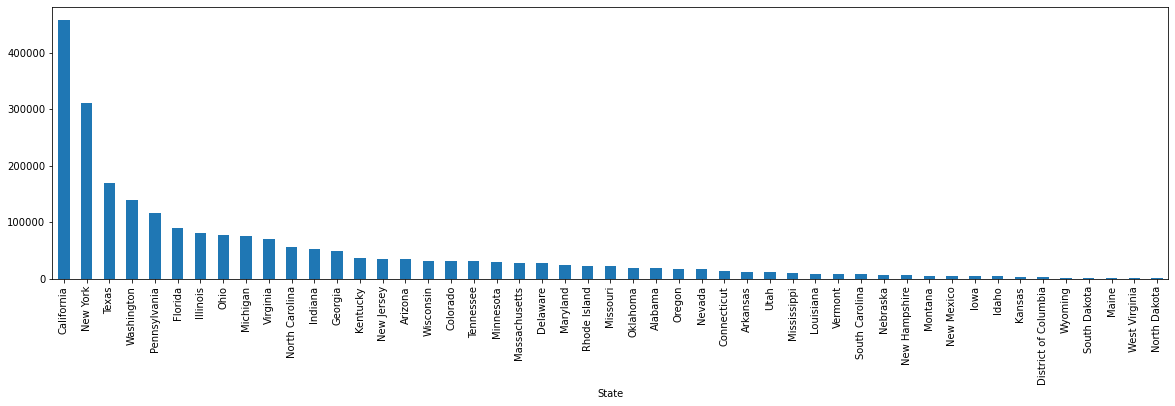

In [32]:
q13a = ss.groupby(["State"])["Sales"].sum().sort_values(ascending=False)
q13a.plot.bar(figsize=(20,5))


This Bar Graph shows how many Sales were recorded in each state in order from highest to lowest. However, Washington isn't even even in the top 10 of state populations, so its large share of the sales must be attributable to something else such as affluence.


<AxesSubplot:xlabel='Region'>

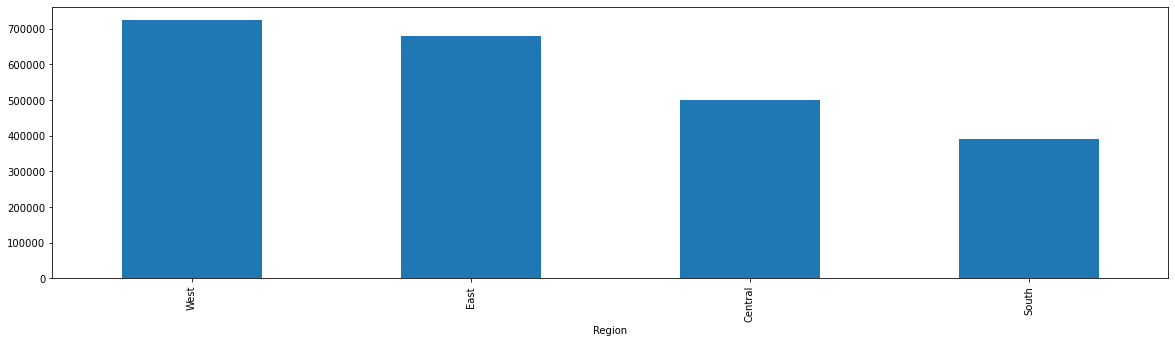

In [33]:
q13b = ss.groupby(["Region"])["Sales"].sum().sort_values(ascending=False)
q13b.plot.bar(stacked=True,figsize=(20,5))

The coastal regions share the largest chunk of sales, likely due to population again. However, there are plenty of people in the South as well, so perhaps they could be marketed to more effectively.

<AxesSubplot:xlabel='Region'>

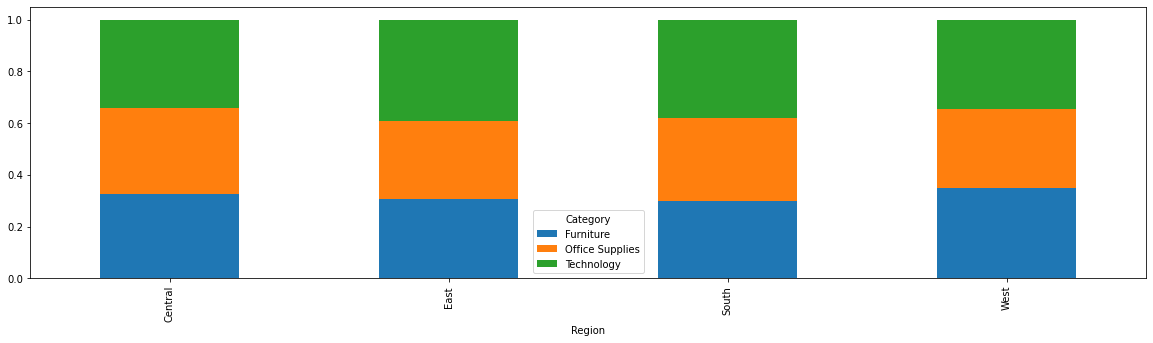

In [37]:
q13c = ss.groupby(["Region","Category"])["Sales"].sum().sort_values(ascending=False).unstack()
q13c = q13c.divide(q13c.sum(axis=1),axis=0)
q13c.plot.bar(figsize=(20,5),stacked=True)

The East appears to buy a higher proportion of technology, while the West buys the highest proportion of furniture.



<AxesSubplot:xlabel='Segment'>

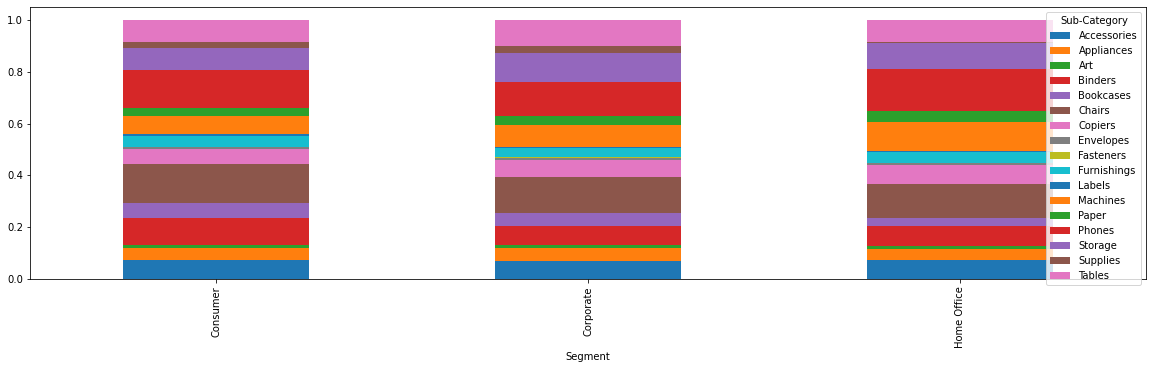

In [38]:
q13d = ss.groupby(["Segment","Sub-Category"])["Sales"].sum().sort_values(ascending=False).unstack()
q13d = q13d.divide(q13d.sum(axis=1),axis=0)
q13d.plot.bar(figsize=(20,5),stacked=True)

It seems that corporate customers buy a higher proportion of bookcases than the others. Home office customers seem to buy the highest proportion of binders.



<AxesSubplot:xlabel='Segment'>

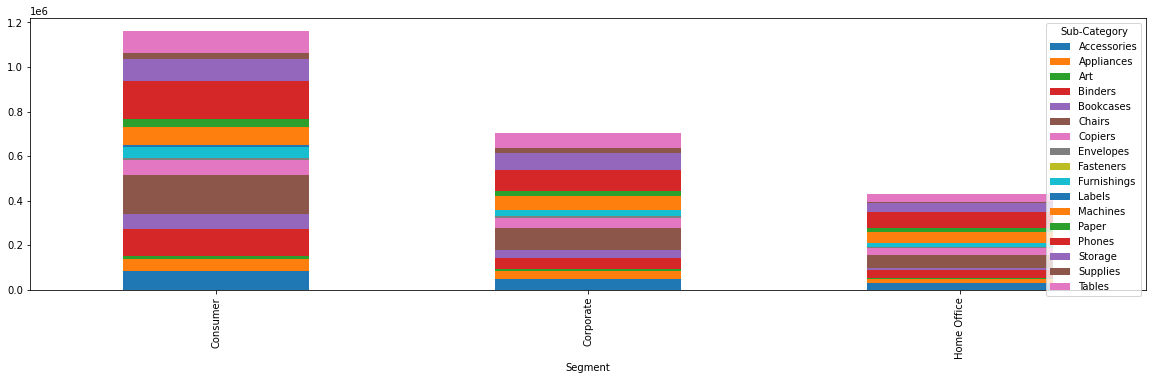

In [39]:
q13e = ss.groupby(["Segment","Sub-Category"])["Sales"].sum().sort_values(ascending=False).unstack()
# q13e = q13e.divide(q13e.sum(axis=1),axis=0)
q13e.plot.bar(figsize=(20,5),stacked=True)

However, consumers buy the highest quantity of pretty much all subcategoreies compared to the other two customer segments.